In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [3]:
print('Sample count per class:\n{}'.format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample count per class:
{'malignant': 212, 'benign': 357}


In [4]:
# to get a description of the semantic meaning of each feature, we can use feature_names attribute
print('Feature names:\n{}'.format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try n neighbor from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    


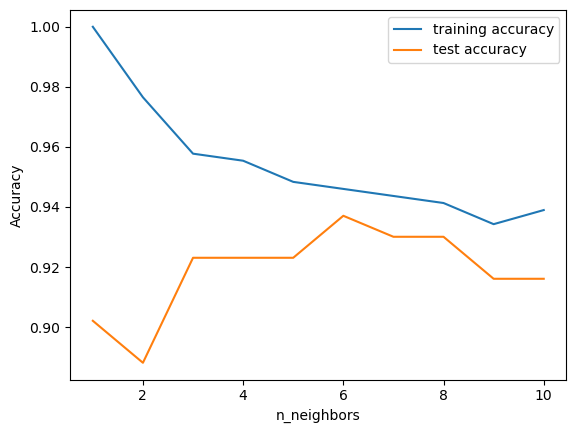

In [6]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


the plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.
Considering a single nearest neighbor, the prediction on training set is perfect. But when more neighbors are 
considered, the model becomes simpler and the training accuracy drops.
The test set accuracy for using a single neighbor is lower than when using more neighbor, indicating that using the
single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model
is too simple and performance is even worse . 
the best performance is somewhere in the middle, using around 6 neighbors. Still, it is good to keep the scale of the plot
in the mind. The performance is around 88% accuracy, which might still be acceptable.


### Applying Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver='lbfgs', max_iter=3000).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(logreg.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test,y_test)))

# Note: the default solver in LogisticRegression is 'lbfgs' and the maximum number of iterations is 100 by default.
# but with the default setting you will get warning. to solve this issue we have to increase the number of iterations (max_iter).
# Note: lbfgs stand for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". 
# It is one of the solvers' algorithms provided by Scikit-Learn Library.


Accuracy on training set: 0.958
Accuracy on test set: 0.958


In [32]:
# the default value of C=1 provides quite good performance, with 95% accuracy on both the training and test set. 
# But as training and testing set performance are very close, it is likely that we are underfitting. Try to increase C 
# to fit a more flexible model.

logreg100 = LogisticRegression(C=100,solver='lbfgs', max_iter=5000).fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test,y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.958


### Applying Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))


If we don't restrict the depth of a decision tree, the tree can become arbitrarily deep and complex.
Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Below we will apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Limitting the depth of tree decreases overfitting. This lead to lower accuracy on the training data but an improvement on the test set:

In [11]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


### Applying Random Forest 


In [8]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test,y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972



Ref for this notebook: "O'Reily Introduction to ML with Python"